In [12]:
import matplotlib.pyplot as plt
import torch
import torch.nn as nn

def draw_mlp(input_size, hidden_layers, output_size, figsize=(8, 6), layer_labels=True):
    layers = [input_size] + hidden_layers + [output_size]
    n_layers = len(layers)
    
    fig, ax = plt.subplots(figsize=figsize)
    ax.axis('off')
    ax.set_xlim(0, 1)
    ax.set_ylim(0, 1)

    # Position nodes layer-wise
    layer_positions = []
    for i, n_neurons in enumerate(layers):
        x = i / (n_layers - 1)
        y_positions = [(j + 1) / (n_neurons + 1) for j in range(n_neurons)]
        layer_positions.append([(x, y) for y in y_positions])

        # draw neurons
        for pos in layer_positions[-1]:
            circle = plt.Circle(pos, 0.01, color='black', fill=True)
            ax.add_patch(circle)

        if layer_labels:
            if i == 0:
                ax.text(x, 1.02, 'Input', ha='center')
            elif i == n_layers - 1:
                ax.text(x, 1.02, 'Output', ha='center')
            else:
                ax.text(x, 1.02, f'Hidden {i}', ha='center')

    # connect neurons
    for i in range(len(layer_positions) - 1):
        for src in layer_positions[i]:
            for dst in layer_positions[i + 1]:
                ax.plot([src[0], dst[0]], [src[1], dst[1]], 'gray', lw=0.5)

    #plt.title(f"Neural Network Architecture: {layers}")
    plt.tight_layout()
    plt.show()


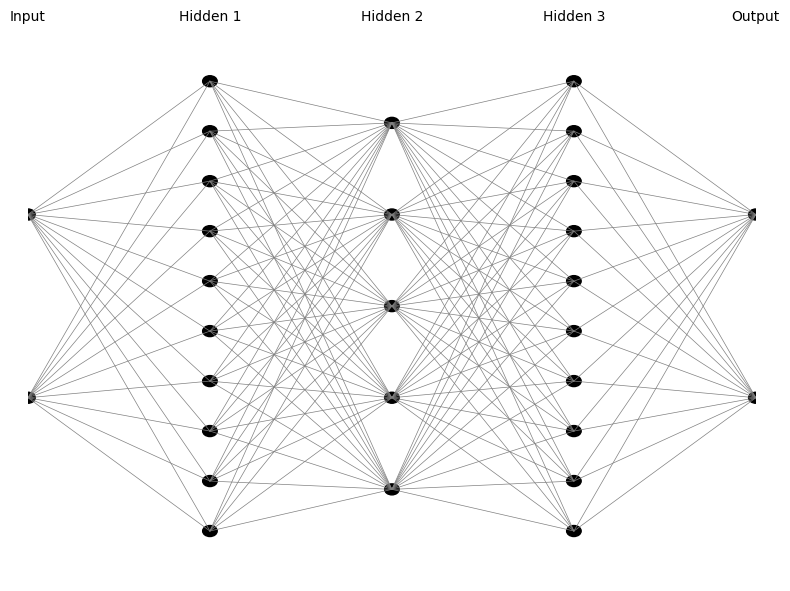

In [13]:
net_config = {
    'name': 'Standard [10, 10]',
    'model_params': {
        'input_dim': 2,
        'hidden_layers': [10, 5, 10],
        'output_dim': 2,
        'activation': nn.ReLU()
    }
}

draw_mlp(
    input_size=net_config['model_params']['input_dim'],
    hidden_layers=net_config['model_params']['hidden_layers'],
    output_size=net_config['model_params']['output_dim']
)
